# HW 7

This assignment covers several aspects of Regularizations & Tree type Classifier. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials
    
* [Lasso Regression - L1 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

* [Ridge Regression - L2 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

* [Metrics : Precision-Recall curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

# Data Processing

**Data** 
* Get the exploratory data and the folowing files from [link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
* Save metadata and the original data from download [Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) to your local HW folder. 
* If you are using command line, the commands are:  
```
>> wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
>> wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names
``` 
* wget instructions: 
  * dowload it from [link](https://eternallybored.org/misc/wget/) 
  * follow [steps](https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command)

**Q1** Get training data from the dataframe
1. Load breast-cancer-wisconsin.data into data frame
2. Note: the data file does not contains column names, so include appropriate column names by exploring the metadata file
3. Replace Non-Numeric values with 0
4. Replace Class label ```2 with 0``` and ```4 with 1```
4. Assign values of ```Class``` column to ```y```, note you have to use ```.values``` method
5. Drop ```Class``` column from data frame,
6. Assign df values to x
7. Split dataset into train and test data use train_test_split with test_size = 0.2, stratify y and random_state = 1238

**A1** Replace ??? with code in the code cell below

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Read the breast-cancer-wisconsin.data file using the prropriate separator as input to read_csv()
columns=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',
'Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df = pd.read_csv('breast-cancer-wisconsin.data', names=columns)
df.head(10)
# Replace Non numeric values with 0 
df.replace('?', 0, inplace=True)

#Replace the Class label values following above given instructions
df['Class'].replace(2,0,inplace=True)
df['Class'].replace(4,1,inplace=True)

In [2]:
# Assign values of ```Class``` column to y, note you have to use .values method
y = df.Class.values
# Drop 'donation_stat' column from data frame,
df.drop(columns=['Class'], inplace=True)
# Assign df values to x
x = df.values
# View shape of x and y
print(x.shape)
print(y.shape)

xtrain, xtest, ytrain, ytest =  train_test_split(x,y, test_size = 0.2, random_state=1, stratify=y)

(699, 10)
(699,)


# Model Regularization

## Ridge Regularization/ Ridge Regression

**Q2** Train Ridge Regularization Model
1. Create a Ridge Regularization Model using sklearn library, ```(See the documenttaion for details)```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data

**Note**
* Here we generate an array of cost values ranging from very big to very small 
  * cost here is variable alpha: alpha is equivalent to lambda in the lesson 13. 
 ![RidgeRegression](../figures/RidgeRegression.jpg) 
* Associated with each alpha value is a vector of ridge regression coefficients that we store in a matrix, with 100 rows (one for each value of alpha) and 10 columns (one for each predictor).  

**A2** Replace ??? with code in the code cell below

In [3]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(xtrain, ytrain)
    coefs.append(ridge.coef_)
    
np.shape(coefs) 

pred1 = ridge.predict(xtest)           # Use this model to predict the test data
print(pd.Series(ridge.coef_, index = df.columns[0:11])) # Print coefficients
mse = mean_squared_error(ytest, pred1)          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(ridge.score(xtest,ytest))

Sample code number            -5.300095e-09
Clump Thickness                3.114880e-02
Uniformity of Cell Size        2.496008e-02
Uniformity of Cell Shape       1.495604e-02
Marginal Adhesion              1.193529e-02
Single Epithelial Cell Size    7.472790e-03
Bare Nuclei                    4.364115e-02
Bland Chromatin                2.098688e-02
Normal Nucleoli                1.406423e-02
Mitoses                        5.404237e-04
dtype: float64
Test mean squared error (MSE): 0.04
0.8022250503711507


### Precision-Recall Curve for Ridge1

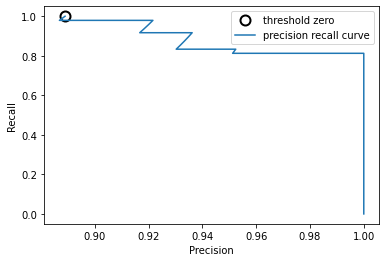

In [4]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest,pred1)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


**Q3** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 4, normalize = True to Ridge()```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data

**A3** Replace ??? with code in the code cell below

In [5]:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(xtrain,ytrain)            
pred2 = ridge2.predict(xtest)      

#print model coefficients      
print(pd.Series(ridge2.coef_, index = df.columns[0:11])) 
mse = mean_squared_error(ytest, pred2)       
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score  
print(ridge2.score(xtest,ytest))

Sample code number            -5.686298e-09
Clump Thickness                1.318217e-02
Uniformity of Cell Size        1.277455e-02
Uniformity of Cell Shape       1.301451e-02
Marginal Adhesion              1.156621e-02
Single Epithelial Cell Size    1.388992e-02
Bare Nuclei                    1.222152e-02
Bland Chromatin                1.483758e-02
Normal Nucleoli                1.064847e-02
Mitoses                        1.028324e-02
dtype: float64
Test mean squared error (MSE): 0.08
0.6316014948791386


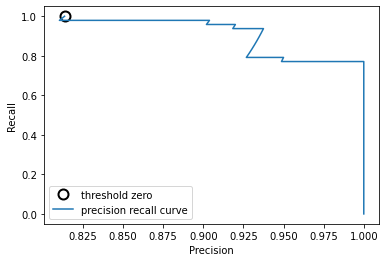

In [6]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest,pred2)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q4** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 100, normalize = True to Ridge()```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data

**A4** Replace ??? with code in the code cell below

In [7]:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(xtrain,ytrain)             
pred3 = ridge3.predict(xtest) 

#print model coefficients      
print(pd.Series(ridge3.coef_, index = df.columns[0:11])) 
mse = mean_squared_error(ytest, pred3)       
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score
print(ridge3.score(xtest,ytest))


Sample code number            -5.615598e-18
Clump Thickness                1.215090e-11
Uniformity of Cell Size        1.281772e-11
Uniformity of Cell Shape       1.300501e-11
Marginal Adhesion              1.182081e-11
Single Epithelial Cell Size    1.503064e-11
Bare Nuclei                    1.073005e-11
Bland Chromatin                1.472678e-11
Normal Nucleoli                1.110324e-11
Mitoses                        1.244216e-11
dtype: float64
Test mean squared error (MSE): 0.23
-2.561227221931084e-05


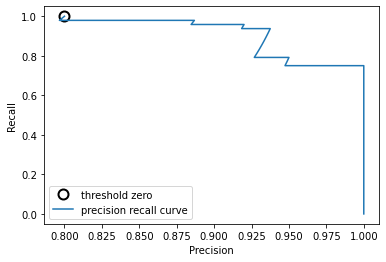

In [8]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest,pred3)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q5** Train Ridge Regression Model on the training set, and evaluate
1. Now, Create a Ridge Regression passing ```alpha = 0, normalize = True to Ridge()```
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data

**A5** Replace ??? with code in the code cell below

In [9]:
ridge4 = Ridge(alpha=0, normalize=True)
ridge4.fit(xtrain,ytrain)             
pred4 = ridge4.predict(xtest)   

#print model coefficients      
print(pd.Series(ridge4.coef_, index = df.columns[0:11])) 
mse = mean_squared_error(ytest, pred4)      
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print score      
print("Test mean squared error (MSE): {:.2f}".format(mse))
print(ridge4.score(xtest,ytest))

Sample code number            -5.220075e-09
Clump Thickness                3.122935e-02
Uniformity of Cell Size        2.536441e-02
Uniformity of Cell Shape       1.456714e-02
Marginal Adhesion              1.177444e-02
Single Epithelial Cell Size    7.266571e-03
Bare Nuclei                    4.403729e-02
Bland Chromatin                2.086232e-02
Normal Nucleoli                1.408810e-02
Mitoses                        4.401656e-04
dtype: float64
Test mean squared error (MSE): 0.04
Test mean squared error (MSE): 0.04
0.8023901980651084


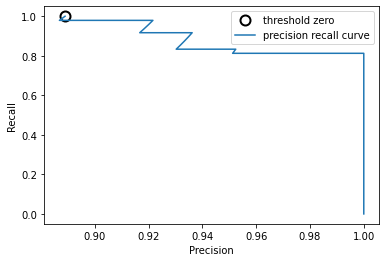

In [10]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest,pred4)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

**Q6** **Study the codes above and answer the following questions:***

1. Why when passing alpha = 100, the coefficients become very small? 
2. Does alpha = 4 improve the MSE comparing to regular least squares?
3. How the size of alphas affects MSE and the Score of the models? 


**A6** Your answers:

1. The larger is the alpha, the higher is the smoothness constraints. Higher alpha makes coefficients much smaller with less flexibility of the fit.

2. No, the performemce degrades comparing with the Regular Least Squares(RLS) (Which basically is the fit with alpha=0). alpha=0 or RLS achieves MSE=0.04

3. The higher value of alpha makes the model less flexible with the test data and the model becomes overfitted. The smaller value of alpha helps to generalized the model. So, the Score and MSE also increases with the test data.


# Lasso Regularization

**Q7 Create a Lasso Regression passing ```max_iter = 10000, normalize = True to Lasso()```**

1. se the alphas from the 2nd question for setting parameters in Lasso
2. Fit the model with the train data
3. Predict the values with the test data
4. Print the coefficients of the model
5. Calculate the test MSE 
6. Get the score from the model using test data
7. Plot Precision-Recall Curve from the true & predicted test data


**A7** 

Replace ??? with code in the code cell below


In [11]:
#Lasso regression
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(xtrain, ytrain)
    coefs.append(lasso.coef_)

np.shape(coefs) 

pred1_lasso = lasso.predict(xtest)           # Use this model to predict the test data
print(pd.Series(lasso.coef_, index = df.columns[0:11])) # Print coefficients
mse = mean_squared_error(ytest, pred1_lasso)          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(lasso.score(xtest,ytest))

Sample code number            -0.000000
Clump Thickness                0.011989
Uniformity of Cell Size        0.032729
Uniformity of Cell Shape       0.014725
Marginal Adhesion              0.000000
Single Epithelial Cell Size    0.000000
Bare Nuclei                    0.035803
Bland Chromatin                0.011835
Normal Nucleoli                0.000000
Mitoses                        0.000000
dtype: float64
Test mean squared error (MSE): 0.07
0.7028839667219621


Text(0, 0.5, 'Recall')

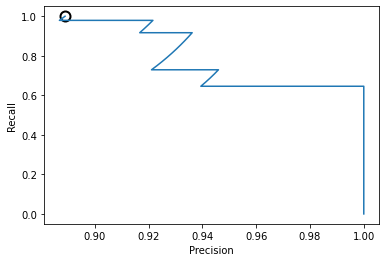

In [12]:
#pass necessary parameters to precision_recall_curve method  
precision, recall, thresholds = precision_recall_curve(ytest,pred1_lasso)

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")


**Q8 Observe the lasso.coef and ridge.coef, and discuss the findings below**


**A8**  Your answer goes here: In the Lasso regression, the model works better when coefficients of the model is smaller. But on the otherhand, in Ridge regression, the model performs better with higher values of coefficients.